In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Creo que mi función que resuelve por diferencias finitas

In [2]:
def wave_equation_2D(x_i, x_f, y_i, y_f, Nx, Ny, T, dt, c):
    hx = (x_f - x_i) / (Nx + 1)
    hy = (y_f - y_i) / (Ny + 1)

    x = np.linspace(x_i, x_f, Nx + 2)
    y = np.linspace(y_i, y_f, Ny + 2)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((Nx + 2, Ny + 2, T))

    for i in range(1, Nx + 1):
        for j in range(1, Ny + 1):
            Z[i, j, 0] = np.exp(-((x[i] - (x_i + x_f) / 2) ** 2 + (y[j] - (y_i + y_f) / 2) ** 2))
            Z[i, j, 1] = Z[i, j, 0]

    for t in range(2, T):
        for i in range(1, Nx + 1):
            for j in range(1, Ny + 1):
                Z[i, j, t] = (2 * Z[i, j, t - 1] - Z[i, j, t - 2] +
                              (c**2 * dt**2 / hx**2) *
                              (Z[i + 1, j, t - 1] - 2 * Z[i, j, t - 1] + Z[i - 1, j, t - 1]) +
                              (c**2 * dt**2 / hy**2) *
                              (Z[i, j + 1, t - 1] - 2 * Z[i, j, t - 1] + Z[i, j - 1, t - 1]))
    return Z, X, Y

Función para graficar

In [5]:
def plot_wave(W, T, x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(x, y)  # Generar la malla X, Y con los vectores de posición

    for t in range(T):
        ax.clear()
        ax.plot_surface(X, Y, W[:, :, t], cmap='viridis', edgecolor='none')
        ax.set_xlim(x[0], x[-1])  # Usar límites del vector x
        ax.set_ylim(y[0], y[-1])  # Usar límites del vector y
        ax.set_zlim(-1, 1)        # Ajustar límites en Z
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Amplitud')
        ax.set_title(f"Simulación de la propagación de la onda, t = {t}")
        plt.pause(0.01)

    plt.show()


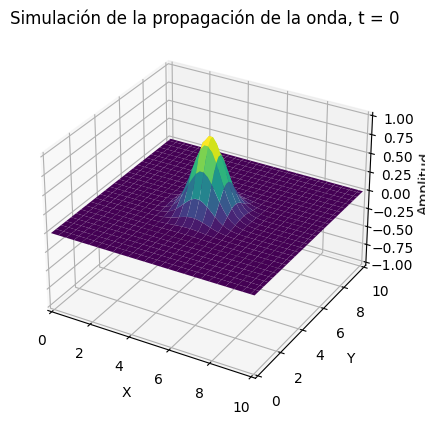

: 

In [ ]:
# Parámetros
x_i, x_f = 0, 10
y_i, y_f = 0, 10
Nx, Ny = 50, 50  # Resolución
T = 500          # Pasos de tiempo
dt = 0.09        # Tamaño del paso de tiempo
c = 1            # Velocidad de la onda

# Llamar la función para resolver la ecuación de onda
W, X, Y = wave_equation_2D(x_i, x_f, y_i, y_f, Nx, Ny, T, dt, c)

# Crear los vectores de posición para graficar
x = np.linspace(x_i, x_f, Nx + 2)
y = np.linspace(y_i, y_f, Ny + 2)

# Graficar la solución
plot_wave(W, T, x, y)